# Lecture 31: Threshold Accepting

---

## Overview

Much like the Tabu Search algorithm, the Threshold Accepting algorithm is designed to search for high-quality solutions in complex search space while avoiding local optimal traps. However, unlike the Tabu Search, this algorithm does so with fewer degrees of freedom (input parameters). It starts by initialising the current solution – $s$, and the best solution – $s^*$, from the given initial solution – $s_o$. The algorithm then iterates searching the solution space for better solutions until it has achieved threshold level of solution quality or computation effort. In each such iteration, the algorithm generates a random new solution by applying a defined set of transformations to the current solution defined by the neighbourhood – $N(s)$. Notably, unlike any of the previously discussed algorithms, the Threshold Accepting algorithm accepts this new solution as the current solution even if it is somewhat worse than the current solution. Specifically, if the difference in objective function values of the new and the current solution is less than a predefined threshold – $Δ (Δ>0)$, then the algorithm sets the current solution to this new solution. However, the algorithm updates the best solution only if the new solution is better than the best. Finally, upon convergence, the Threshold Accepting algorithm returns the best solution.

The Threshold Accepting algorithm balances solution diversification (exploration) by accepting certain inferior solutions as the current solution, and solution intensification (exploitation) by only accepting better solutions as the best solution. And while the Tabu Search achieves this balance by maintaining a dedicated list of “tabooed” and “accepted” solutions, the Threshold Accepting algorithm does so with just one parameter – $Δ$. This allows for fast implementation with low computational effort due to minimal fine-tuning and memory requirements. Nonetheless, if the threshold is set too high, then the algorithm will have a slow convergence (exploration bias). On the other hand, it the threshold is set too low, then the algorithm will get stuck on a local optimal (exploitation bias). Thus, with appropriately sized threshold, the algorithm can swiftly converge to high quality solutions, even for problems with complex multimodal solution landscape.

Despite its simplicity, the Threshold Accepting algorithm has found limited use for optimisation in Transportation Engineering. Beyond transportation systems however, the algoirthm has been deployed succesfully to address job scheduling and timetable optimisation problems, potentially inspiring its use in ITS for optimising public transit schedule, time table, and dispatch.

---

## Pseudo Code

1. **Procedure** $\text{TA}(s_o, (N, \Delta))$
2. $s ← s_o$ &emsp;<small>// initialise current solution $s$ as the initial solution $s_o$</small>
3. $s^* ← s$ &emsp;<small>// initialise best solution $s^*$ as the current solution</small>
4. **while** $!\text{converged}$ **do** &emsp;<small>// repeat until converged</small>
5. &emsp;$s' {R \atop ←} N(s)$ &emsp;<small>// generate new random solution from neighborhood $N$ of the current solution</small>
6. &emsp;$\delta ← f(s') - f(s)$ &emsp;<small>// calculate the difference in objective values</small>
7. &emsp;**if** $\delta < \Delta$ **then** &emsp;<small>// if the new solution is within threshold $\Delta$ of the current solution</small>
8. &emsp;&emsp;$s ← s'$ &emsp;<small>// update the current solution to the new solution</small>
9. &emsp;**end if**
10. &emsp;**if** $f(s) < f(s^*)$ **then** &emsp;<small>// if the current solution is better than the best solution</small>
11. &emsp;&emsp;$s^* ← s$ &emsp;<small>// update the best solution to the current solution</small>
12. &emsp;**end if**
13. **end while**
14. **return** $s^*$ &emsp;<small>// return the best solution</small>

---

## Implementation

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def ta(s_o, N, D, n=100, t=1e-5):
    """
    Threshold Accepting Algorithm
    
    Parameters:
    - s_o: Initial solution
    - N: Neighborhood function
    - Delta: Threshold for acceptance
    - n: Number of iterations
    - t: Convergence threshold
    
    Returns:
    - Current and Best solution found in each iteration
    """
    s   = s_o     # Current solution
    s_b = s       # Best solution found
    S_c = [s_b]   # Track current solutions over iterations
    S_b = [s_b]   # Track best solutions over iterations
    
    i = 1
    e = float('inf')
    converged = False
    while not converged:
        s_n = N(s)                      # Generate a random neighbor
        d   = f(s_n) - f(s)             # Compute objective function difference
        
        if d < D:                       # Accept if within threshold
            s = s_n
        
        if f(s) < f(s_b):               # Update best solution if improved
            e = f(s_b) - f(s)
            s_b = s
        
        S_c.append(s)                   # Store best solution at each iteration
        S_b.append(s_b)                 # Store best solution at each iteration
        
        i += 1
        if i >= n or e <= t:            # Convergence condition
            converged = True
    
    return S_c, S_b

---

## Case Study

### Ackley Function

Text(0.5, 0.92, 'Ackley Function Surface Plot')

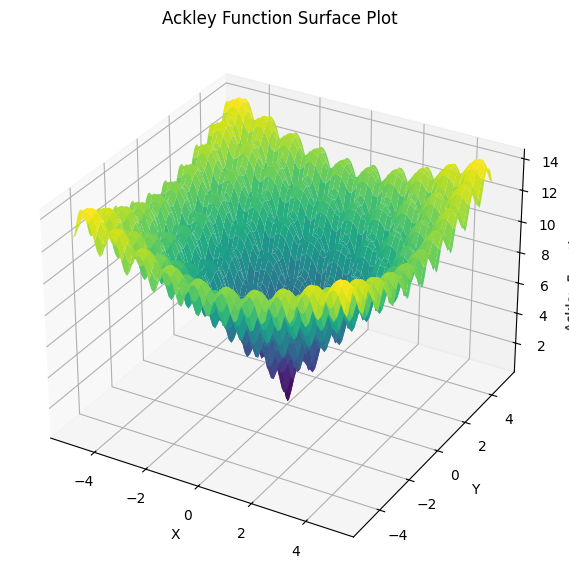

In [16]:
def f(s):
    """
    Computes the Ackley function for given solution s.

    Parameters:
    - s: Tuple of input coordinates

    Returns:
    - Function value at s
    """
    x, y = s
    return -20 * np.exp(-0.2 * np.sqrt((x**2 + y**2) / 2)) + -np.exp((np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)) / 2) + 20 + np.exp(1)

# Generate a grid of (x, y) values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([[f(s) for s in zip(r, c)] for r, c in zip(X, Y)])

# Plot the Ackley function
fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Ackley Function Value")
ax.set_title("Ackley Function Surface Plot")

Best solution: [-0.009495771252343688, 0.036628439152833314]
Objective function value: 0.14472579764519056


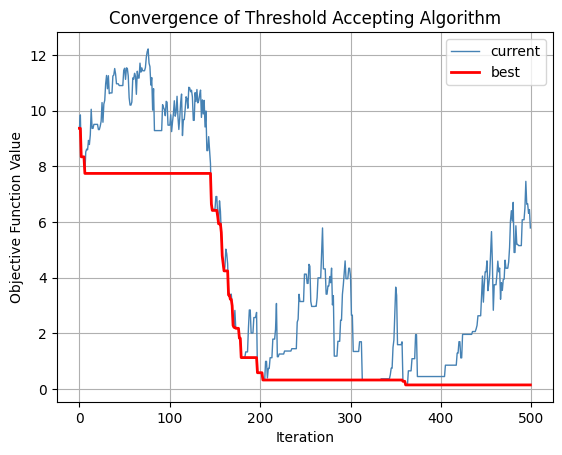

In [17]:
def N(s):
    x, y = s
    x += np.random.uniform(-0.5, 0.5)
    y += np.random.uniform(-0.5, 0.5)
    s = [x,y]
    return s

s_o = [random.uniform(-5, 5), random.uniform(-5, 5)]
S_c, S_b = ta(s_o, N, 1, 500)
F_c = [f(s) for s in S_c]
F_b = [f(s) for s in S_b]

# Report outcome
print("Best solution:", S_b[-1])
print("Objective function value:", f(S_b[-1]))

# Convergence plot
fig = plt.figure()
plt.plot(F_c, label='current', color='steelblue', linewidth=1)
plt.plot(F_b, label='best', color='red', linewidth=2)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Threshold Accepting Algorithm")
plt.grid()
plt.show()

---

### Transit System Optimisation

Consider a transit network with 5 routes each with route length (kms) of 45, 50, 40, 60, 55, respectively, and travel time (mins) of 90, 75, 80, 100, 95, respectively. Here, the operations cost for route $i$ is given by the cost of customer waiting time $c_t \times 1/2f_i$ and cost of bus operations $c_b \times l_i \times f_i \times t_i$, where $c_t = 150$ is the value of time and $c_b = 35$ is driver, fuel, and maintenance cost of the bus per km. Given service constraint (minimum route frequency of 0.5 bus/hr) and fleet size constraint (8 buses in total), the objective is to optimise the transit service, minimizing the total operations cost from all routes.

Best solution: [1.0939317944858264, 1.2079972076600771, 1.2107235935182958, 1.0002793057216834, 0.9749559012666356]
Number of buses: 6.4323245021977025
Objective function value: 397.6773081577291


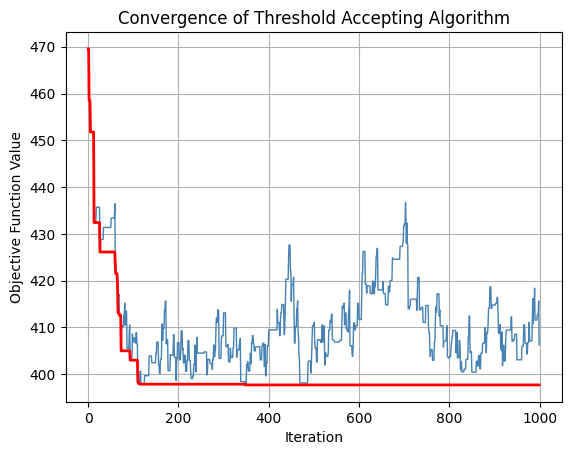

In [13]:
import random
import matplotlib.pyplot as plt

# Route Length
l = [45, 50, 40, 60, 55]

# Travel Time
t = [90, 75, 80, 100, 95]

# Cost
c_t = 150       # Value of Time        (Rs. per hr)
c_b = 35        # Bus Operational Cost (Rs. per km)

# Thresholds
f_l = 0.5       # Lower limit on frequency
b_u = 8         # Fleet size

# Compute transit operations cost
def f(s):
    """
    Computes the transit operations cost for given solution s.

    Parameters:
    - s: Vector of frequencies for each route

    Returns:
    - Function value at s
    """
    c_w = 0   # Total Wait Time Cost
    c_o = 0   # Total Bus Operational Cost
    c_p = 0   # Total Penalty
    nob = 0   # Number of Buses
    for i in range(0,len(s)):
        f_i = s[i]
        t_i = t[i] / 60
        l_i = l[i]
        if f_i < f_l:
          c_p += 100000
        c_w += c_t * 1/(2 * f_i)
        c_o += b_u * f_i * t_i * l_i / 60
        nob += f_i * t_i

    if nob > b_u:
        c_p += 100000

    c = c_w + c_o + c_p

    return c

# Generate Neighbourhood
def N(s):
    s = s.copy()
    for i in range(0,len(s)):
      s[i] += np.random.uniform(-0.1, 0.1)

    return s

s_o = [random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5)]
S_c, S_b = ta(s_o, N, 5, 1000)
F_c = [f(s) for s in S_c]
F_b = [f(s) for s in S_b]

s_b = S_b[-1]
nob = 0
for i in range(0,len(s_b)-1):
    nob += s_b[i] * t[i] / 60

# Report outcome
print("Best solution:", s_b)
print("Number of buses:", nob)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F_c, label='current', color='steelblue', linewidth=1)
plt.plot(F_b, label='best', color='red', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Threshold Accepting Algorithm")
plt.grid()
plt.show()